In [1]:
from chemkin_CS207_G9.Reaction import Reaction
from chemkin_CS207_G9.ReactionSystem import ReactionSystem
from chemkin_CS207_G9.database_query import CoeffQuery

In [2]:
import os
import chemkin_CS207_G9
BASE_DIR = os.path.dirname(os.path.abspath(chemkin_CS207_G9.__file__))

path_xml = os.path.join(BASE_DIR, 'rxns_reversible.xml') # path to the .xml file
path_sql = os.path.join(BASE_DIR, 'nasa_thermo.sqlite')  # path to the .sqlite file

In [3]:
nasa_query = CoeffQuery(path_sql)

In [4]:
import sqlite3

In [5]:
db = sqlite3.connect(path_sql)
cursor = db.cursor()

In [6]:
query = '''SELECT * FROM LOW'''
cursor.execute(query).fetchall()

[('O',
  200.0,
  1000.0,
  3.1682671,
  -0.00327931884,
  6.64306396e-06,
  -6.12806624e-09,
  2.11265971e-12,
  29122.2592,
  2.05193346),
 ('O2',
  200.0,
  1000.0,
  3.78245636,
  -0.00299673416,
  9.84730201e-06,
  -9.68129509e-09,
  3.24372837e-12,
  -1063.94356,
  3.65767573),
 ('H',
  200.0,
  1000.0,
  2.5,
  7.05332819e-13,
  -1.99591964e-15,
  2.30081632e-18,
  -9.27732332e-22,
  25473.6599,
  -0.446682853),
 ('H2',
  200.0,
  1000.0,
  2.34433112,
  0.00798052075,
  -1.9478151e-05,
  2.01572094e-08,
  -7.37611761e-12,
  -917.935173,
  0.683010238),
 ('OH',
  200.0,
  1000.0,
  3.99201543,
  -0.00240131752,
  4.61793841e-06,
  -3.88113333e-09,
  1.3641147e-12,
  3615.08056,
  -0.103925458),
 ('H2O',
  200.0,
  1000.0,
  4.19864056,
  -0.0020364341,
  6.52040211e-06,
  -5.48797062e-09,
  1.77197817e-12,
  -30293.7267,
  -0.849032208),
 ('HO2',
  200.0,
  1000.0,
  4.30179801,
  -0.00474912051,
  2.11582891e-05,
  -2.42763894e-08,
  9.29225124e-12,
  294.80804,
  3.71666245),


In [114]:
from chemkin_CS207_G9.xml2dict import xml2dict

reader = xml2dict()
reader.parse(path_xml)
info = reader.get_info()

In [115]:
species = info[0]
reactions = [Reaction(**r) for r in info[1]]

In [154]:
T = 200
concentrations = {"O":2, 'H':1, 'O2':1, "H2O":1, "OH":1, "H2O2":1, "H2":1, "HO2":1}
rs = ReactionSystem(
    reactions, species, nasa_query, 
    initial_concs= concentrations, initial_T=T)

In [155]:
reac_rate = rs.get_reac_rate()
reac_rate

array([  4.86294327e+27,  -4.84235679e+27,  -4.90411623e+27,
         1.05359887e+13,   2.05864801e+25,   4.86294327e+27,
        -1.72894778e+14,  -2.68813942e+12])

In [156]:
progress_rate = rs.get_progress_rate()
progress_rate

array([ -4.86294327e+27,  -9.42181271e+10,   8.18752453e+10,
        -2.05864801e+25,   1.01194004e+13,   5.92820257e+13,
         6.50000000e+13,   3.89677752e+13,   2.21371644e+12,
         4.04245419e+11,   7.01775668e+10])

In [191]:
import graphviz 
from graphviz import Digraph
dot_b = Digraph(comment='Bipartite Graph')

In [192]:
with dot_b.subgraph(name='cluster_1') as c:
#     c.attr(style='filled')
    c.attr(label='Reaction', labelloc = 'b')
    c.attr(color='red')
    for idx, r in enumerate(reactions):
        c.node(str(idx))

In [202]:
with dot_b.subgraph(name='cluster_0') as c:
#     c.node_attr.update(style='filled')
    c.attr(color='blue')
    c.attr(label='Species')
    for s in species:
        c.node(s, **{'width': size(concentrations[s]), 'height':size(concentrations[s])})

In [201]:
def size(conc_s, concentrations = concentrations):
    size = conc_s / max(concentrations.values())
    
    ## no need to afraid too small
    
    return str(size)

In [203]:
import random
def color():
    c1 = random.random()
    c2 = random.random()
    c3 = random.random()
    return "{0}, {1}, {2}".format(c1, c2, c3)

In [204]:
for idx, r in enumerate(reactions):
    c = color()
    for k1 in r.getReactants():
        dot_b.edge(k1, str(idx), color = c)
    for k2 in r.getProducts():
        dot_b.edge(str(idx), k2, color = c)

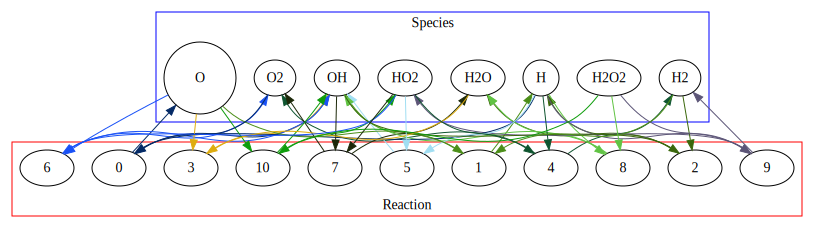

In [205]:
dot_b

color of node?

In [72]:
import graphviz 
from graphviz import Digraph
dot = Digraph(comment='Hierarchical Graph')

In [73]:
for s in species:
    dot.node(s)

In [74]:
for r in reactions:
    c = color()
    for idx, k1 in enumerate(r.getReactants().keys()):
        for k in r.getProducts():
            dot.edge(k1, k, color= c)
        for jdx, k2 in enumerate(r.getReactants().keys()):
            if k1 != k2 and jdx > idx:
                dot.edge(k1, k2, arrowhead = 'none', color = c)   

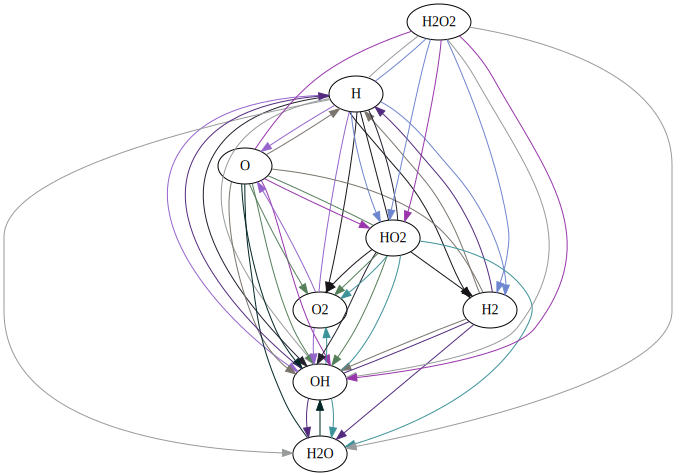

In [75]:
dot